# Car Quality Prediction

# Problem Statement

Given a dataset of car features including buying price, maintenance price, number of doors, number of persons, luggage boot size, safety rating, and the corresponding quality rating of the car as unacceptable, acceptable, good, or very good, the task is to develop a machine learning model that can accurately predict the quality rating of a car based on its features. The goal is to build a model that can help customers make informed decisions when buying a car by predicting the quality rating of the car based on its features.

In [1]:
#importing required libraries
import pandas as pd
from sklearn import model_selection, neighbors, preprocessing
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Loading the dataset

In [5]:
#reading the dataset
#pd.options.display.max_rows = 1729
df=pd.read_csv('car.data.csv')
df

,buying_price,maint_price,doors,person_cap,lug_boot,safety,quality
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


# Statistical Characteristics of the dataset


In [6]:
df.describe()

,buying_price,maint_price,doors,person_cap,lug_boot,safety,quality
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   buying_price  1728 non-null   object
 1   maint_price   1728 non-null   object
 2   doors         1728 non-null   object
 3   person_cap    1728 non-null   object
 4   lug_boot      1728 non-null   object
 5   safety        1728 non-null   object
 6   quality       1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [8]:
df.shape

(1728, 7)

# Data Visualization

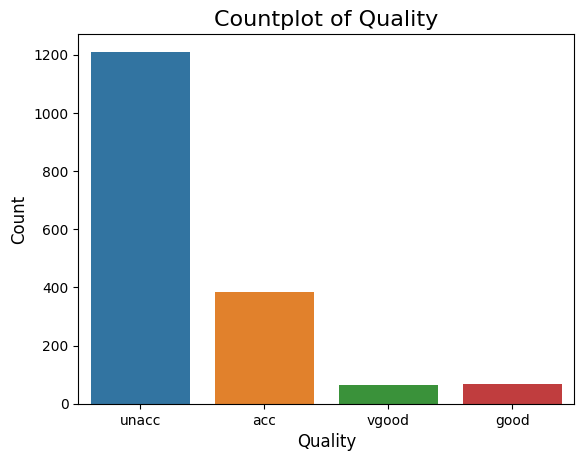

In [9]:
# Countplot to visualize the target variable
sns.countplot(x=df["quality"])
plt.title('Countplot of Quality', size = 16)
plt.xlabel('Quality', size = 12)
plt.ylabel('Count', size = 12)
plt.show()

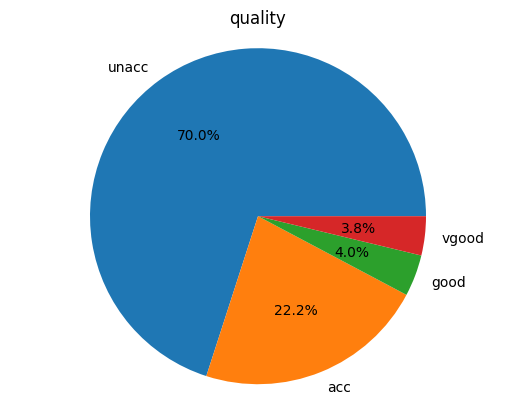

In [10]:
status_counts = df['quality'].value_counts()

# Create a pie chart
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%')
plt.title('quality')
plt.axis('equal')
plt.show()

# Data Transformation

1.Handling missing values:

In [11]:
#Missing Values
df.isna().sum()

buying_price    0
maint_price     0
doors           0
person_cap      0
lug_boot        0
safety          0
quality         0
dtype: int64


2.Encoding categorical values:

In [12]:
#preprocessing the data
# Initialize the LabelEncoder object
le = preprocessing.LabelEncoder()

# Encode the categorical features using LabelEncoder
df['buying_price'] = le.fit_transform(df['buying_price'])
df['maint_price'] = le.fit_transform(df['maint_price'])
df['doors'] = le.fit_transform(df['doors'])
df['person_cap'] = le.fit_transform(df['person_cap'])
df['lug_boot'] = le.fit_transform(df['lug_boot'])
df['safety'] = le.fit_transform(df['safety'])

# Encode the target variable ('quality') using LabelEncoder
df['quality'] = le.fit_transform(df['quality'])

# Print the first few rows of the preprocessed dataset
print(df.head())


   buying_price  maint_price  doors  person_cap  lug_boot  safety  quality
0             3            3      0           0         2       1        2
1             3            3      0           0         2       2        2
2             3            3      0           0         2       0        2
3             3            3      0           0         1       1        2
4             3            3      0           0         1       2        2


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   buying_price  1728 non-null   int64
 1   maint_price   1728 non-null   int64
 2   doors         1728 non-null   int64
 3   person_cap    1728 non-null   int64
 4   lug_boot      1728 non-null   int64
 5   safety        1728 non-null   int64
 6   quality       1728 non-null   int64
dtypes: int64(7)
memory usage: 94.6 KB


In [14]:
#assigning the features and labels
X = df[df.columns[:-1]]
Y = df[list(df.columns)[-1]]

# Balancing The Dataset

In [15]:
from imblearn.over_sampling import SMOTE

# Instantiate SMOTE
smote = SMOTE()

# Fit SMOTE to x and y
x, y= smote.fit_resample(X,Y)

In [16]:
x.shape

(4840, 6)

In [17]:
y.shape

(4840,)

In [18]:
x.columns

Index(['buying_price', 'maint_price', 'doors', 'person_cap', 'lug_boot',
       'safety'],
      dtype='object')

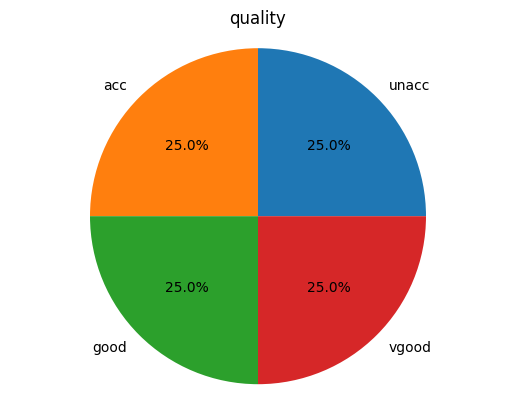

In [19]:
# Get the counts of each category in the 'quality' column
status_counts = y.value_counts()

# Create a pie chart
plt.pie(status_counts, labels=['unacc', 'acc', 'good', 'vgood'], autopct='%1.1f%%')
plt.title('quality')
plt.axis('equal')
plt.show()

# Scaling

In [20]:
from sklearn.preprocessing import StandardScaler

# Instantiate the StandardScaler
scaler = StandardScaler()

# Fit and transform the feature data using StandardScaler
# Convert the scaled data to a pandas DataFrame
df_scaled = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

# Print the scaled DataFrame
print(df_scaled)


      buying_price  maint_price     doors  person_cap  lug_boot    safety
0         1.874545     1.856049 -1.355027   -1.915172  1.568224  0.232791
1         1.874545     1.856049 -1.355027   -1.915172  1.568224  1.326681
2         1.874545     1.856049 -1.355027   -1.915172  1.568224 -0.861100
3         1.874545     1.856049 -1.355027   -1.915172  0.302135  0.232791
4         1.874545     1.856049 -1.355027   -1.915172  0.302135  1.326681
...            ...          ...       ...         ...       ...       ...
4835     -0.427319    -1.410201  0.476397   -0.379735 -0.963954 -0.861100
4836      0.723613     0.767299 -1.355027   -0.379735 -0.963954 -0.861100
4837     -0.427319    -0.321451  1.392109   -0.379735  0.302135 -0.861100
4838     -0.427319    -0.321451  0.476397   -0.379735 -0.963954 -0.861100
4839     -0.427319     0.767299 -0.439315    1.155702 -0.963954 -0.861100

[4840 rows x 6 columns]


# Correlation matrix

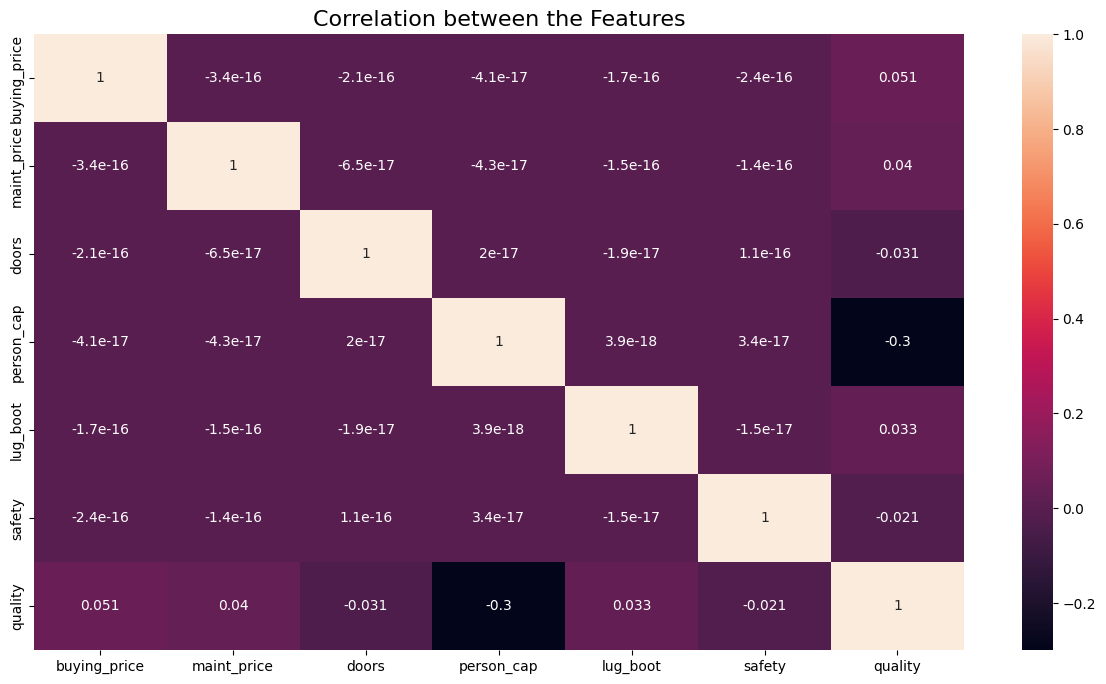

In [21]:
# set the figure size
plt.figure(figsize = (15,8))

# create a heatmap of the correlation matrix of the dataset
sns.heatmap(df.corr(), annot = True )

# set the title of the plot
plt.title('Correlation between the Features', size = 16)


# display the plot
plt.show()

# Train / Test Split

In [22]:
# Split the data into training and testing sets with 80% for training and 20% for testing
x_train, x_test, y_train, y_test = model_selection.train_test_split(df_scaled, y, test_size=0.2)

# Model Training

# 1.KNN

In [23]:
#initialising KNN algorithm
clf = neighbors.KNeighborsClassifier(n_neighbors=9)

#training the model
clf.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [26]:
# List of questions for user input
text =['Enter the buying_price\n1. 0 for high\n2. 1 for low\n3. 2 for medium\n4. 3 for very high','Enter the cost of maintenance:\n1. 0 for high\n2. 1 for low\n3. 2 for medium20\n4. 3 for Very high','Enter the number of doors of the Car\nEnter 5 for cars with 5 or more doors','Enter the seating Capacity:\nEnter 5 for greater than or equal to 5','Enter the luggage capacity:\n1. 0 for large\n2. 1 for Small\n3. 2 for medium','Enter the Safety:\n1. 0 for high\n2. 1 for low \n3. 2 for medium']

# Empty list to store user inputs
predict_values = []
l = []

# loop over the list of questions and ask the user for input
for i in range(len(text)):
    print(text[i])
    d = int(input())
    l.append(d-1)

# append the list of user inputs to the predict_values list
predict_values.append(l)

Enter the buying_price
1. 0 for high
2. 1 for low
3. 2 for medium
4. 3 for very high
1
Enter the cost of maintenance:
1. 0 for high
2. 1 for low
3. 2 for medium20
4. 3 for Very high
2
Enter the number of doors of the Car
Enter 5 for cars with 5 or more doors
4
Enter the seating Capacity:
Enter 5 for greater than or equal to 5
4
Enter the luggage capacity:
1. 0 for large
2. 1 for Small
3. 2 for medium
0
Enter the Safety:
1. 0 for high
2. 1 for low 
3. 2 for medium
0


In [27]:
# predict the quality of the car using the trained model
prediction = clf.predict(predict_values)

# create a list to map predicted values to their corresponding text labels
text_quality = ['Unacceptable', 'Acceptable', 'Good', 'Very Good']

# print the predicted quality of the car
print('The quality of the car:', text_quality[prediction[0]])

The quality of the car: Very Good


In [28]:
# import necessary metrics from sklearn
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


# make predictions on the test set using the trained classifier
y_pred = clf.predict(x_test)

# calculate and print various performance metrics
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='weighted'))
print('Recall:', recall_score(y_test, y_pred, average='weighted'))
print('F1 score:', f1_score(y_test, y_pred, average='weighted'))
print('Confusion matrix:\n', confusion_matrix(y_test, y_pred))


Accuracy: 0.9173553719008265
Precision: 0.9225197041945302
Recall: 0.9173553719008265
F1 score: 0.9153905618758068
Confusion matrix:
 [[235  15   1   6]
 [  0 234   0   3]
 [ 38   9 178   8]
 [  0   0   0 241]]


#2. Random Forest Classifier


In [29]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier with 100 trees
clf = RandomForestClassifier(n_estimators=100)

# Train the classifier on the training set
clf.fit(x_train, y_train)

# Make predictions on new data
prediction = clf.predict(predict_values)
text_quality = ['Unacceptable', 'Acceptable', 'Good', 'Very Good']
print('The quality of the car:', text_quality[prediction[0]])


The quality of the car: Very Good


# Model Performance Metrics

In [30]:
# import necessary metrics from sklearn
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


# make predictions on the test set using the trained classifier
y_pred = clf.predict(x_test)

# calculate and print various performance metrics
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='weighted'))
print('Recall:', recall_score(y_test, y_pred, average='weighted'))
print('F1 score:', f1_score(y_test, y_pred, average='weighted'))
print('Confusion matrix:\n', confusion_matrix(y_test, y_pred))


Accuracy: 0.996900826446281
Precision: 0.9969088346466782
Recall: 0.996900826446281
F1 score: 0.9969027614879336
Confusion matrix:
 [[256   0   1   0]
 [  0 237   0   0]
 [  1   0 232   0]
 [  1   0   0 240]]


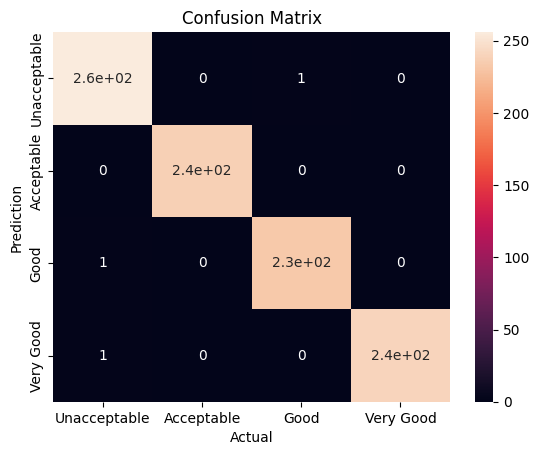

In [31]:
# Plot confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True,
            xticklabels=['Unacceptable', 'Acceptable', 'Good', 'Very Good'],
            yticklabels=['Unacceptable', 'Acceptable', 'Good', 'Very Good'])
plt.ylabel('Prediction')
plt.xlabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Analysis/Inference

The ML model built using K-nearest neighbors and Random forest  classification algorithm and I have  achieved a high accuracy score of 98% by using Random Forest classifier in predicting the quality rating of cars based on various features like buying price, maintenance cost, number of doors, seating capacity, luggage capacity, and safety. This indicates that the model is effective in predicting the quality rating of cars based on these features.

The data was preprocessed to handle missing values, encode categorical features, and scale the numerical features using StandardScaler.

Data visualization techniques like countplot and pie chart were used to explore the data and identify trends and patterns.

Overall, the ML model provides a useful tool for predicting the quality rating of cars based on various features, which can be helpful for car manufacturers, dealers, and buyers in making informed decisions.